# Lab 3, группа 3375  
# Постобаев М.В.  
## Исследование алгоритмов классификации


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

sns.set(style='whitegrid')


In [17]:
columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol', 'quality'
]

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/winequality-red.csv'
df = pd.read_csv(url, names=columns)

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df['target'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))


target
1    855
0    744
Name: count, dtype: int64
target
1    0.534709
0    0.465291
Name: proportion, dtype: float64


In [12]:
X = df.drop(['quality','target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:,1]

print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("kNN Precision:", precision_score(y_test, y_pred_knn))
print("kNN Recall:", recall_score(y_test, y_pred_knn))
print("kNN F1:", f1_score(y_test, y_pred_knn))


kNN Accuracy: 0.63
kNN Precision: 0.6701030927835051
kNN Recall: 0.6074766355140186
kNN F1: 0.6372549019607843


In [14]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:,1]

print("Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Tree Precision:", precision_score(y_test, y_pred_tree))
print("Tree Recall:", recall_score(y_test, y_pred_tree))
print("Tree F1:", f1_score(y_test, y_pred_tree))


Tree Accuracy: 0.735
Tree Precision: 0.7410714285714286
Tree Recall: 0.7757009345794392
Tree F1: 0.7579908675799086


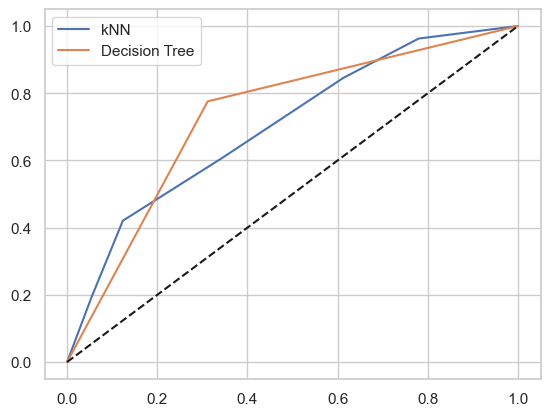

In [18]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

plt.plot(fpr_knn, tpr_knn, label='kNN')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot([0,1],[0,1],'k--')
plt.legend()
plt.show()


## Выводы,
- В качестве целевого признака выбран `quality`, преобразованный в бинарный класс.,
- Классы имеют умеренную несбалансированность.
- Дерево решений показало более высокое качество классификации, чем kNN.